In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\avsmu\Downloads\Data Science Project\wheat.csv")

In [3]:
shapes = dataset.shape
print(shapes)

(210, 8)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    float64
dtypes: float64(8)
memory usage: 13.3 KB


In [5]:
dataset.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry coefficient    0
groove length            0
category                 0
dtype: int64

In [6]:
describes = dataset.describe()

In [7]:
type(describes)

pandas.core.frame.DataFrame

In [8]:
describes

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
custom_index = ["Class1: ", "Class2: ", "Class3: "]

In [10]:
values_counts = dataset["category"].value_counts()

In [11]:
print(values_counts)

1.0    70
2.0    70
3.0    70
Name: category, dtype: int64


In [12]:
cats = pd.Series([x for x in values_counts], index = custom_index)

In [13]:
cats

Class1:     70
Class2:     70
Class3:     70
dtype: int64

In [14]:
colmss = []

In [15]:
for i in dataset["area"]:
    if i < 12:
        colmss.append("small scale")
    elif i >= 12 and i <= 17:
        colmss.append("medium scale")
    else:
        colmss.append("large scale")

In [16]:
dataset["scale"] = colmss

In [17]:
dataset.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category,scale
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0,medium scale
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0,medium scale
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0,medium scale
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0,medium scale
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0,medium scale


In [18]:
dataset["scale"].unique()

array(['medium scale', 'large scale', 'small scale'], dtype=object)

In [19]:
colors = {1.0: "r", 2.0: "b", 3.0: "g"}

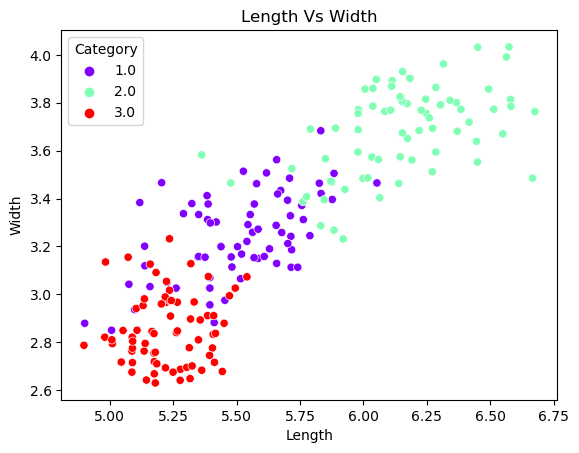

In [20]:
fig = plt.figure()
ax = fig.subplots()
sns.scatterplot(x = dataset["length"], y = dataset["width"], hue = dataset["category"], data = dataset, palette = "rainbow", ax = ax)
ax.set_xlabel("Length")
ax.set_ylabel("Width")
plt.title("Length Vs Width")
ax.legend(title = "Category")
plt.show()

In [21]:
dataset.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category,scale
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0,medium scale
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0,medium scale
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0,medium scale
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0,medium scale
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0,medium scale


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    float64
 8   scale                  210 non-null    object 
dtypes: float64(8), object(1)
memory usage: 14.9+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["scale"] = le.fit_transform(dataset["scale"])

In [24]:
dataset.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category,scale
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0,1


In [25]:
dataset["Category"] = dataset["category"]
dataset.drop(["category"], axis = 1, inplace=True)

In [26]:
dataset.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,scale,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1.0


In [27]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [28]:
X.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,scale
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [29]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Category, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
model_available = classifier.fit(X_train, y_train)

In [33]:
y_pred = model_available.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [37]:
print(f"Accuracy Score: {ac}")

Accuracy Score: 0.9365079365079365


In [38]:
print(f"Classification Report: {cr}")

Classification Report:               precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        26
         2.0       0.91      1.00      0.95        20
         3.0       0.89      1.00      0.94        17

    accuracy                           0.94        63
   macro avg       0.93      0.95      0.94        63
weighted avg       0.94      0.94      0.94        63



In [39]:
print(f"Confusion Matrix: {cm}")

Confusion Matrix: [[22  2  2]
 [ 0 20  0]
 [ 0  0 17]]
